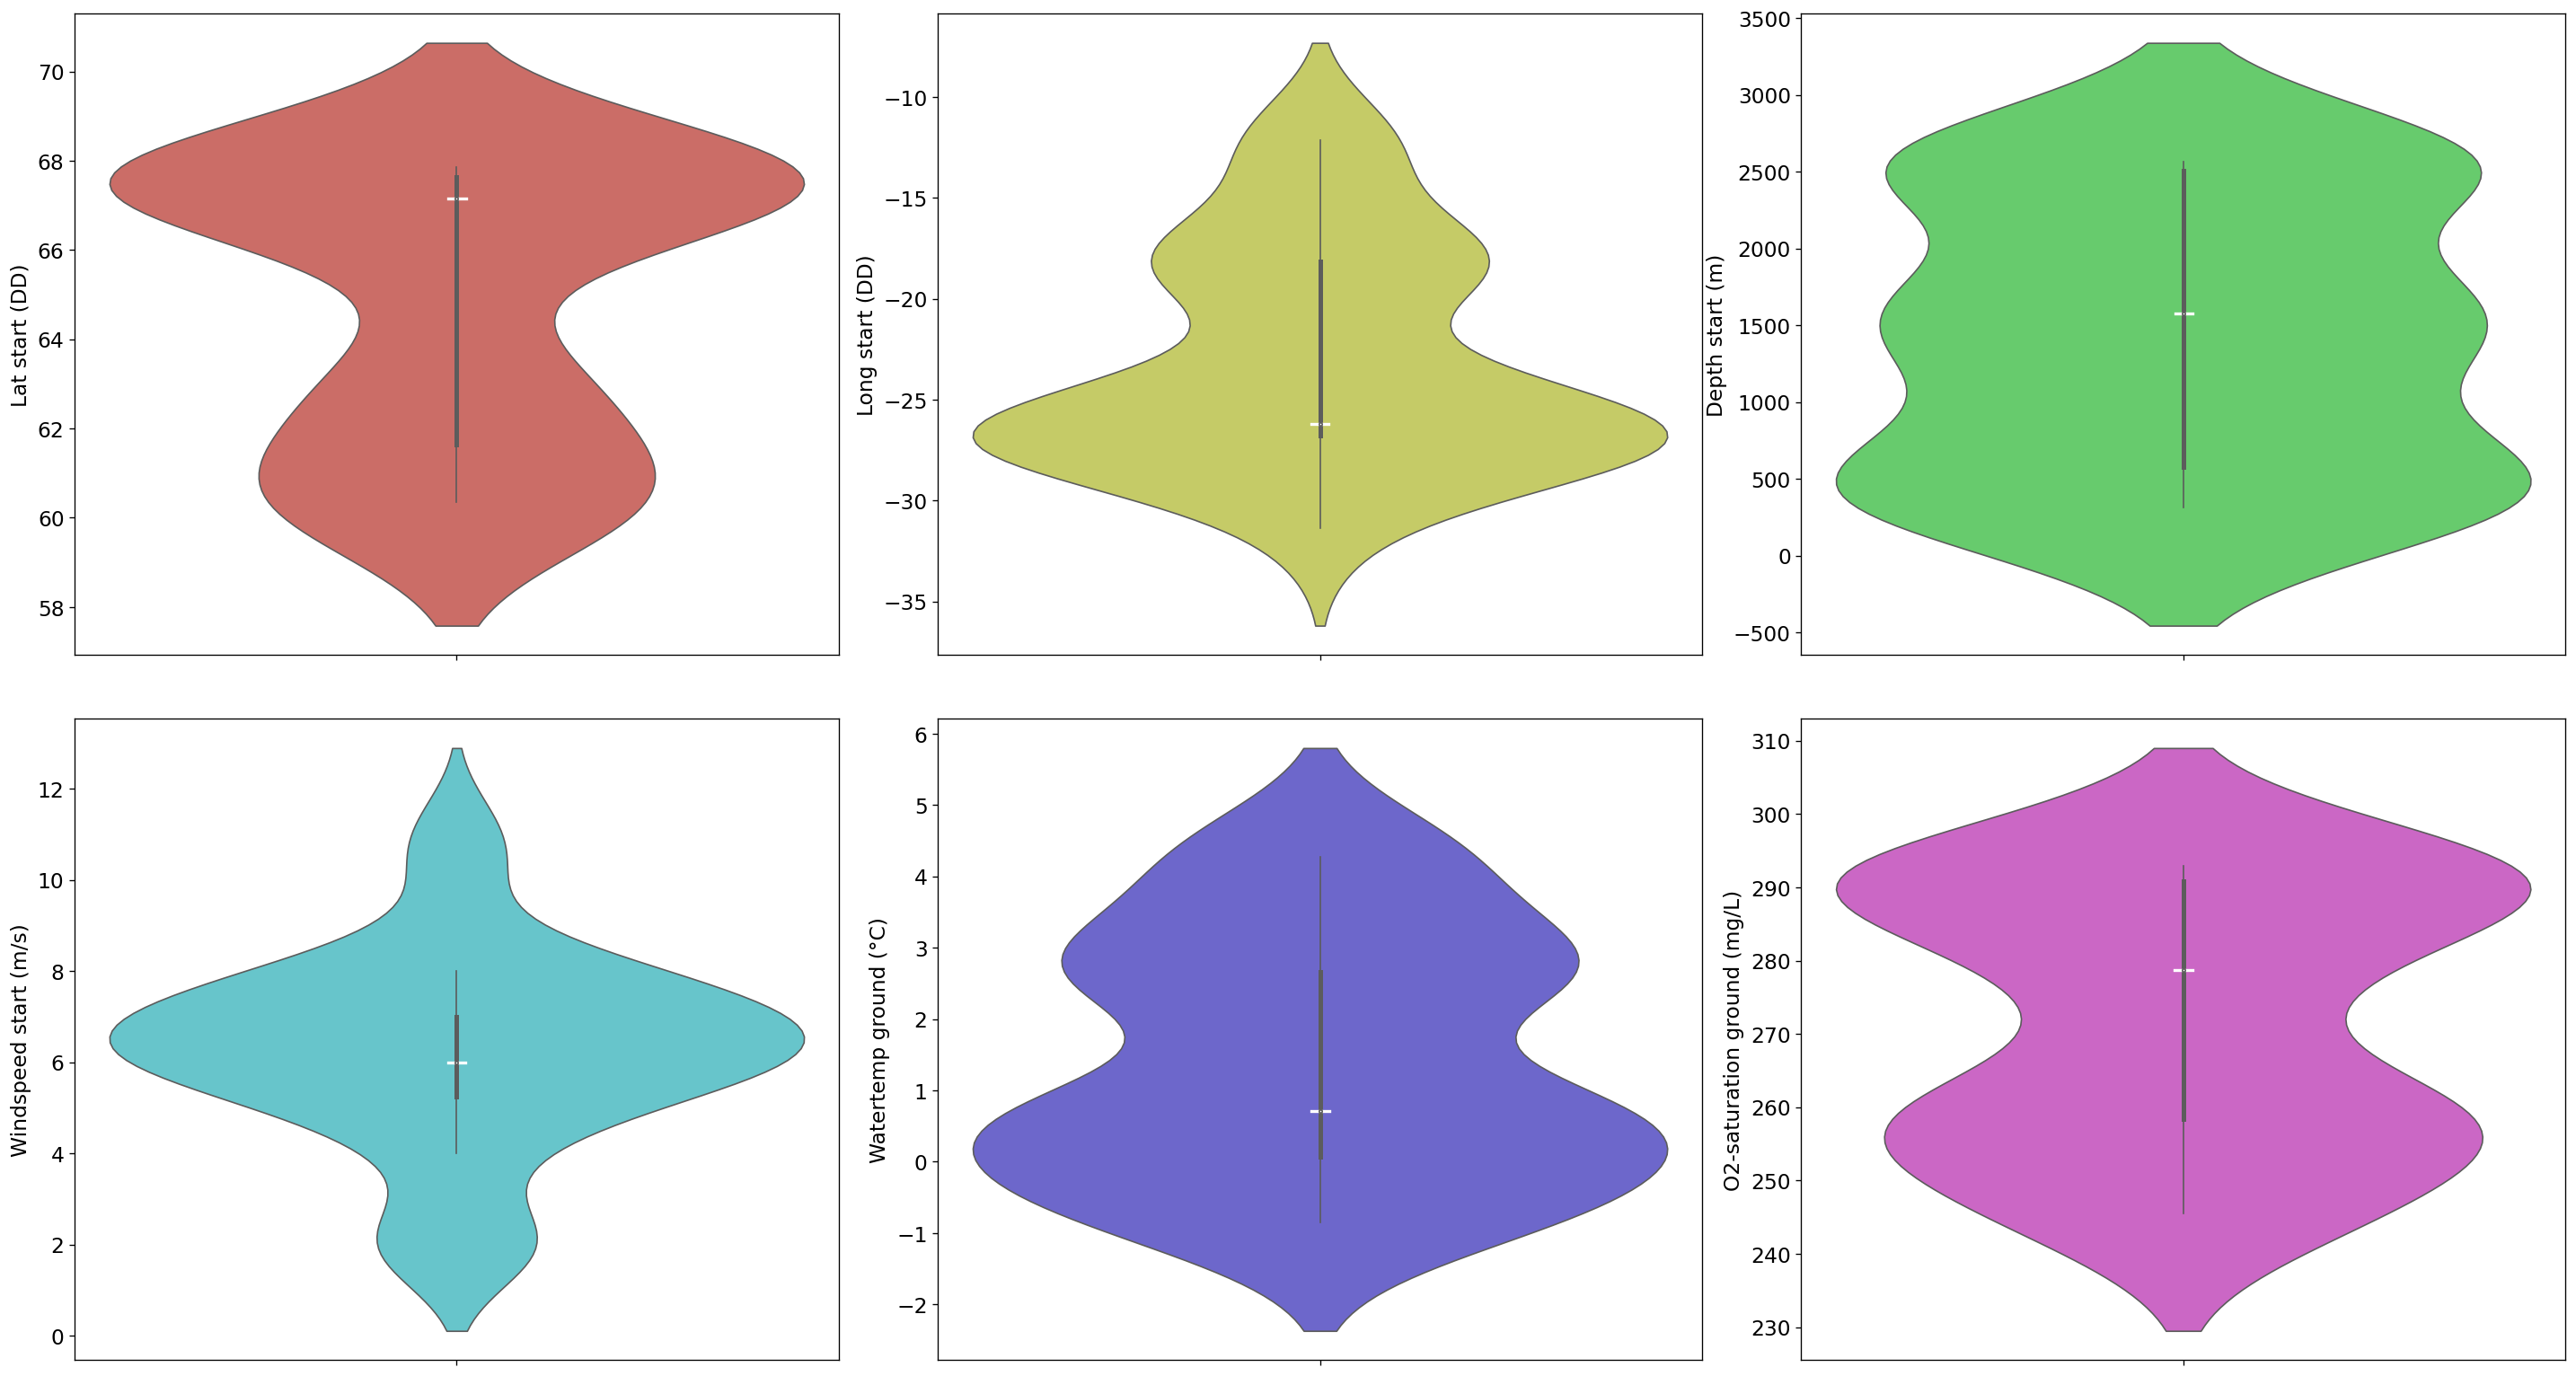

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

df = pd.read_csv('data3.csv')
columns = ['Lat_start_dec', 'Long_start_dec', 'Depth_start', 'Wind_speed_start', 'Watertemp_ground', 'O2-saturation_ground']
column_names = ['Lat start (DD)', 'Long start (DD)', 'Depth start (m)', 'Windspeed start (m/s)', 'Watertemp ground (°C)', 'O2-saturation ground (mg/L)']
fig, axs = plt.subplots(nrows=2, ncols=math.ceil(len(columns)/2), figsize=(8*math.ceil(len(columns)/2), 14), dpi=120)
palette = sns.color_palette("hls", len(columns))

for i, column in enumerate(columns):
    row = i // math.ceil(len(columns)/2)
    col = i % math.ceil(len(columns)/2)
    sns.violinplot(y=df[column], ax=axs[row][col], color=palette[i], orient='v', linewidth=1)
    axs[row][col].set_xlabel("")  
    axs[row][col].set_ylabel(column_names[i], fontsize=14)  
    axs[row][col].tick_params(axis='both', labelsize=14)  

    mean = df[column].mean()
    median = df[column].median()
    std_dev = df[column].std()
    quartiles = df[column].quantile([0.25, 0.75]).values
    
    x_center = axs[row][col].collections[0].get_paths()[0].vertices[:, 0].mean()

    # Plot the median line only across the middle of the violin plot
    axs[row][col].plot([x_center - 0.01, x_center + 0.01], [median, median], color='white', linestyle='-', linewidth=2)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.subplots_adjust(hspace=0.1, wspace=0.13)  # Reduced hspace and wspace

plt.savefig('figure1.jpg', format='jpg', dpi=300)
plt.show()